## Train x-modalix example

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [2]:
import os
from autoencodix.configs.default_config import DataConfig, DataInfo, DefaultConfig
import autoencodix as acx


IMGROOT = os.path.join("../data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("../data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("../data/AM3_NO2_raw_cell.tsv")

img_config = DefaultConfig(
    checkpoint_interval=25,
	loss_reduction = "sum",
    class_param="early",
    epochs=4,
    pretrain_epochs=0,
	beta = 0.001,
	gamma= 1.5,
    # gamma= 0,
	delta_class= 0,
	delta_pair = 1,
	learning_rate=0.005,
	k_filter=1000,
	latent_dim=32,
    batch_size=32,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
				scaling="MINMAX",
                translate_direction="to",
                pretrain_epochs=5,
            ),
            "RNA": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
				scaling = "MINMAX",
                translate_direction="from",
            ),
            # "RNA2": DataInfo(
            #     file_path=NUMFILE,
			# 	scaling = "MINMAX",
            #     data_type="NUMERIC",
            # ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    ),
)

xmodalix = acx.XModalix(config=img_config)
xmodalix.run()

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/base/_base_pipeline.py:189: UserWarning: Your config is of type: <class 'autoencodix.configs.default_config.DefaultConfig'>, for this pipeline the default params of: <class 'autoencodix.configs.xmodalix_config.XModalixConfig'> work best
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/data/_filter.py:102: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


Given image size is possible, rescaling images to: 64x64
Successfully loaded 260 images for IMG
anno key: paired
anno key: IMG
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to torch.float32 tensors...
key: train, type: <class 'dict'>
key: valid, type: <class 'dict'>
key: test, type: <class 'dict'>
Check if we need to pretrain: multi_bulk.RNA
pretrain epochs : 0
No pretraining for multi_bulk.RNA
Check if we need to pretrain: img.IMG
pretrain epochs : 5
Starting Pretraining for: img.IMG with <class 'autoencodix.trainers._general_trainer.GeneralTrainer'>
Epoch 1 - Train Loss: 532.3379
Sub-losses: recon_loss: 532.1037, var_loss: 0.2342, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 458.9364
Sub-losses: recon_loss: 458.9364, var_loss: 0.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 314.7984
Sub-losses: recon_loss: 311.0175, var_loss: 3.7809, anneal_factor

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [3]:
# list(xmodalix.result.sample_ids.get(epoch=-1, split="test")['translation']).index('T_34')

Creating plots ...


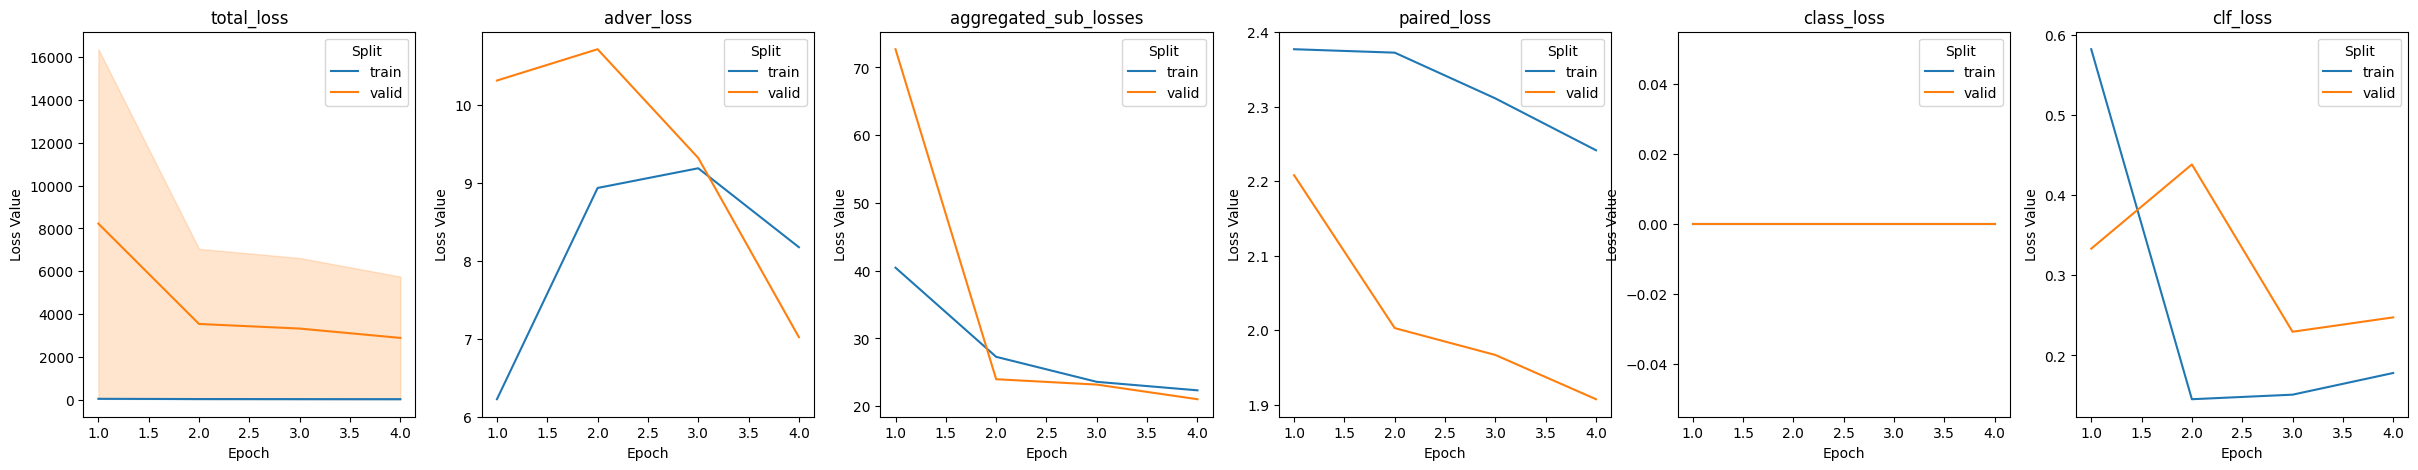

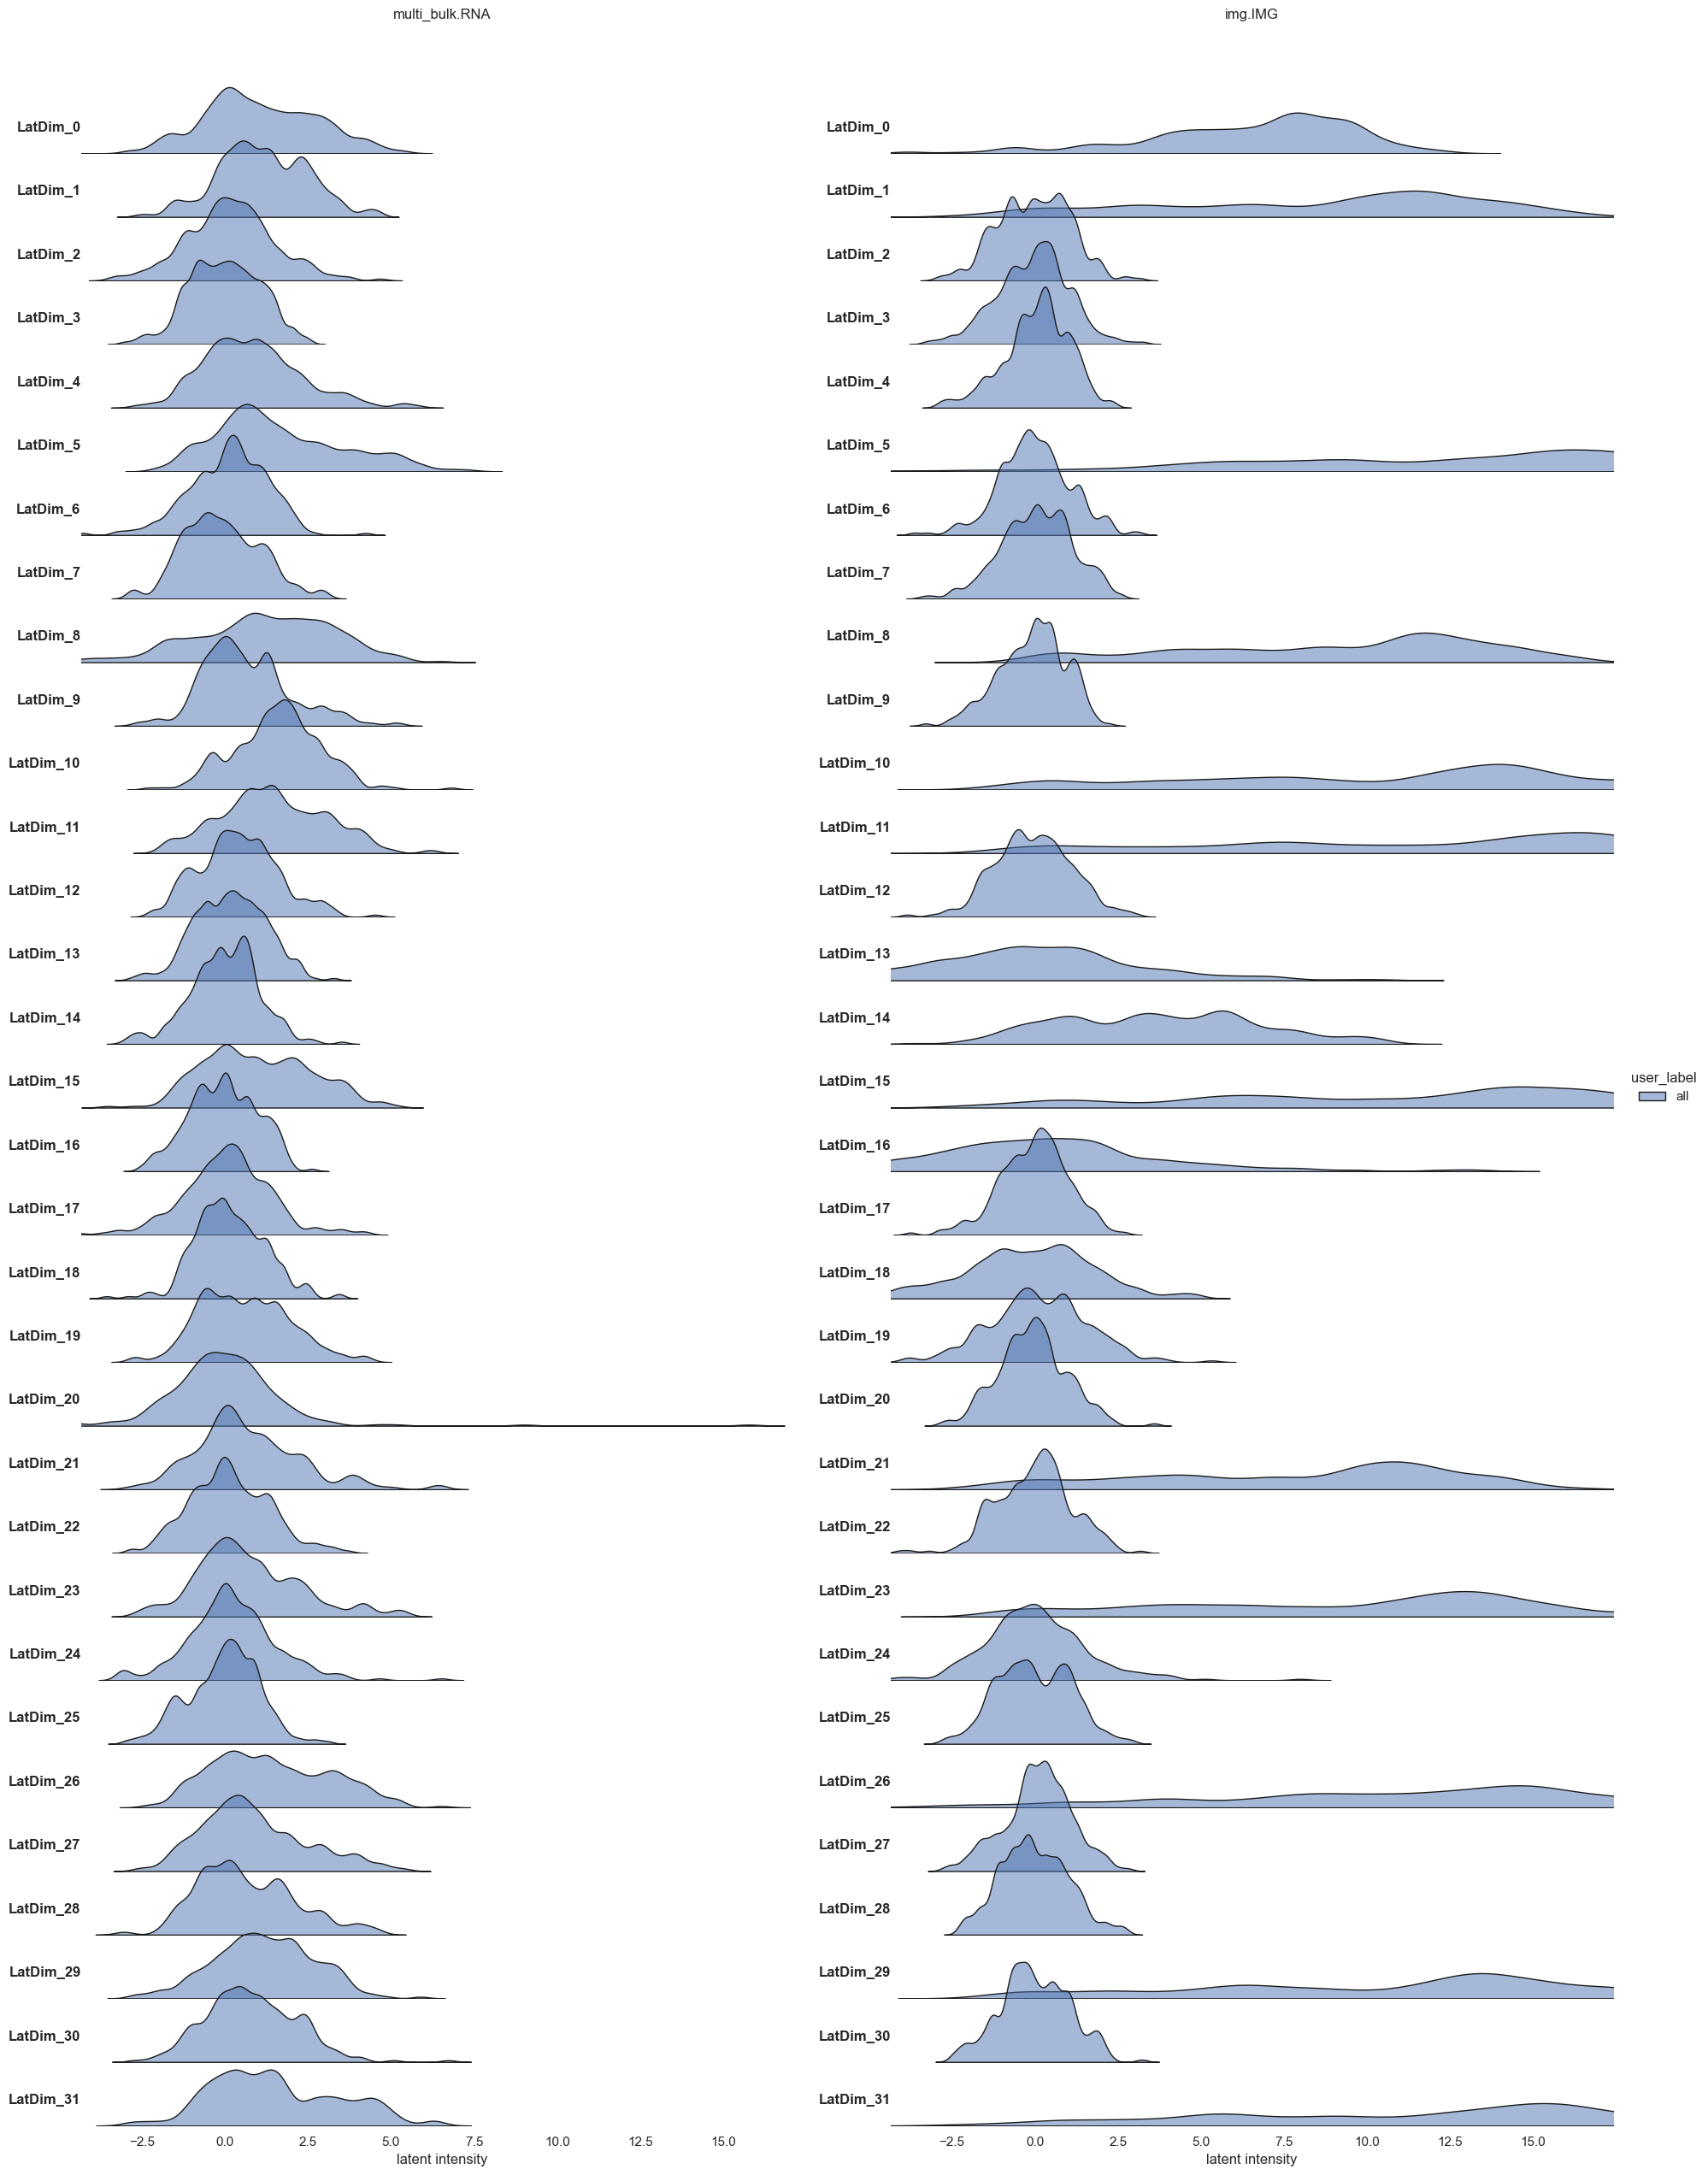

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Index([    nan, 'T_114', 'T_129', 'T_101',  'T_27',  'T_33', 'T_115', 'T_103',
        'T_31',  'T_19',
       ...
       'T_227', 'T_218',  'T_13', 'T_256', 'T_108',  'T_39', 'T_137', 'T_244',
       'T_130', 'T_252'],
      dtype='object', name='sample_ids', length=261)


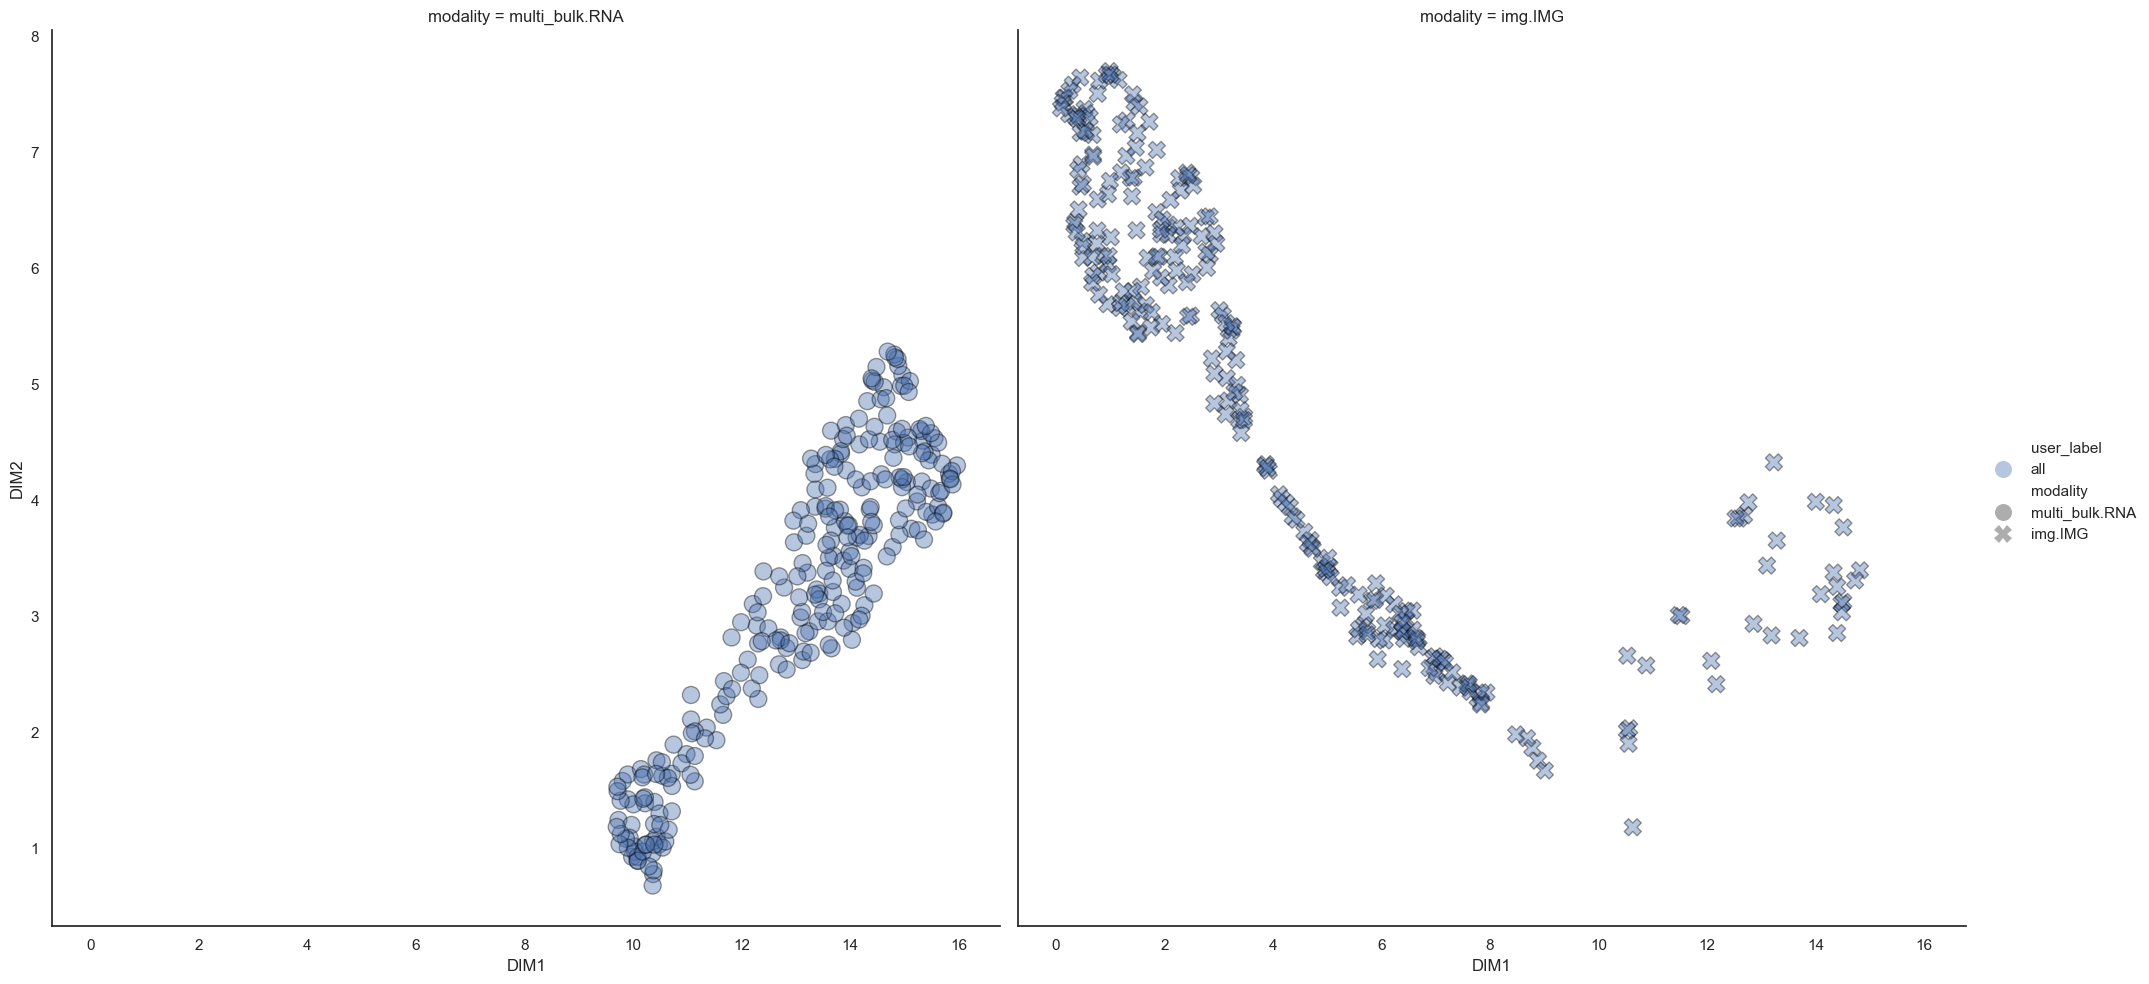

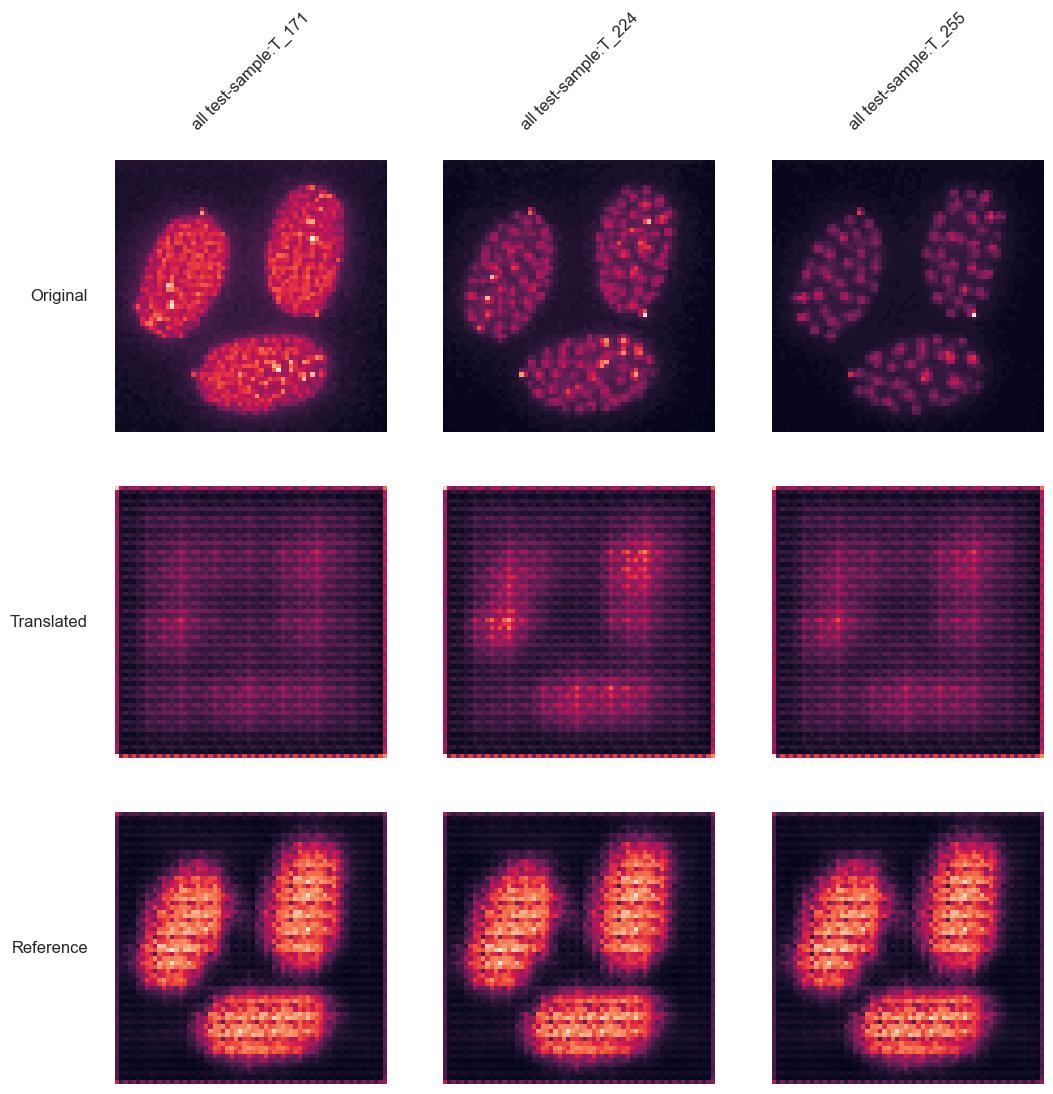

In [4]:
xmodalix.show_result()

In [5]:
to_key ="img.IMG"
print("Original test dataset size:",)
print(len(xmodalix.result.datasets.test.datasets[to_key]))

Original test dataset size:
52


In [6]:
print("Reconstructed test dataset size:",)
print(len(xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"]))

Reconstructed test dataset size:
52


In [7]:
import numpy as np
print("Total sample ids")
print(len(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key]))
print("Unique sample ids")
print(len(np.unique(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key])))

Total sample ids
52
Unique sample ids
52


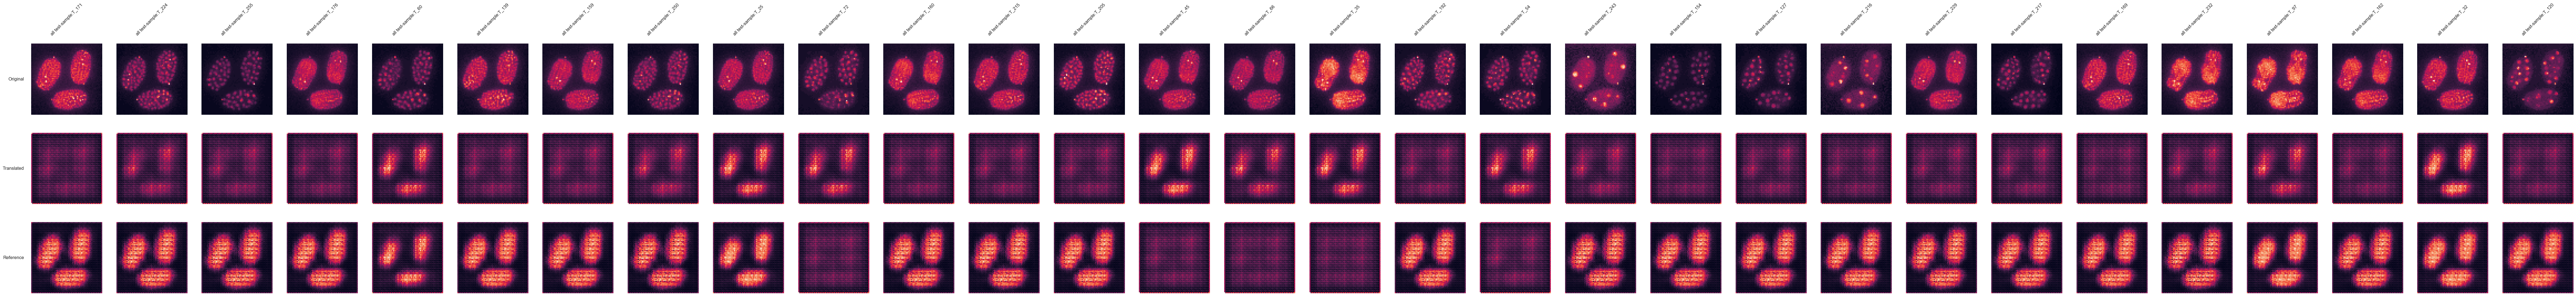

In [8]:
from autoencodix.utils._utils import find_translation_keys

dm_keys = find_translation_keys(config=xmodalix.config, trained_modalities=xmodalix._trainer._modality_dynamics.keys())

xmodalix._visualizer.show_image_translation(result=xmodalix.result, from_key=dm_keys["from"], to_key=dm_keys["to"], n_sample_per_class=30)

## ML embedding eval development

In [9]:
## Evaluate
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovo'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

xmodalix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= ["early", "extra_class_labels"],	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovo'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?
)


Perform ML task with feature df: PCA_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_multi_bulk.RNA
Perform ML task with feature df: PCA_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_img.IMG
Perform ML task with feature df: UMAP_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_multi_bulk.RNA


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Perform ML task with feature df: UMAP_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_img.IMG


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Perform ML task with feature df: RandomFeature_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_multi_bulk.RNA_R1
RandomFeature_$_multi_bulk.RNA_R2
RandomFeature_$_multi_bulk.RNA_R3
RandomFeature_$_multi_bulk.RNA_R4
RandomFeature_$_multi_bulk.RNA_R5
Perform ML task with feature df: RandomFeature_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_img.IMG_R1
RandomFeature_$_img.IMG_R2
RandomFeature_$_img.IMG_R3
RandomFeature_$_img.IMG_R4
RandomFeature_$_img.IMG_R5
Perform ML task with feature df: Latent_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing da

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [10]:
xmodalix.result.embedding_evaluation

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,MODALITY,ML_TASK,ML_SUBTASK
0,train,early,roc_auc_ovo,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,early,roc_auc_ovo,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
2,test,early,roc_auc_ovo,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
0,train,extra_class_labels,r2,0.999651,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,extra_class_labels,r2,0.999677,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
...,...,...,...,...,...,...,...,...,...
1,valid,early,roc_auc_ovo,0.833333,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
2,test,early,roc_auc_ovo,0.761905,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
0,train,extra_class_labels,r2,0.733240,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG
1,valid,extra_class_labels,r2,0.770520,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG


Showing plot for ML algorithm: LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='sag')


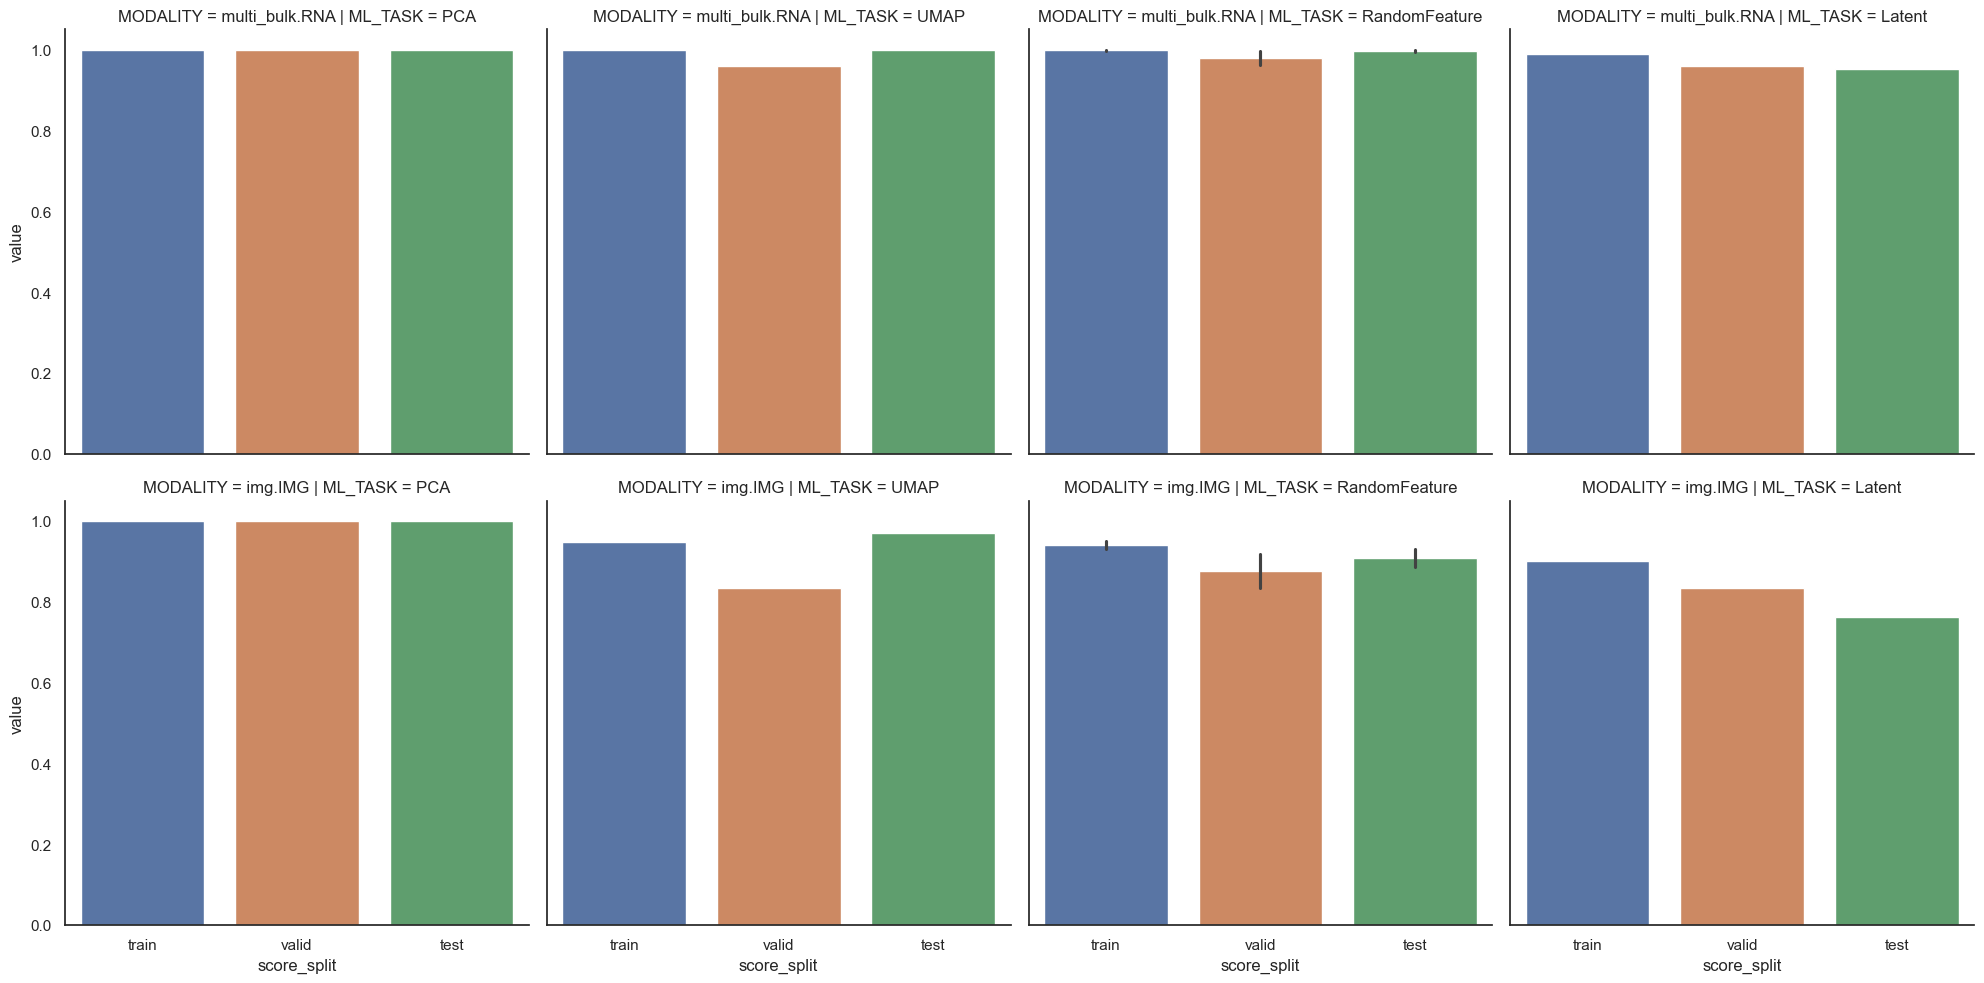

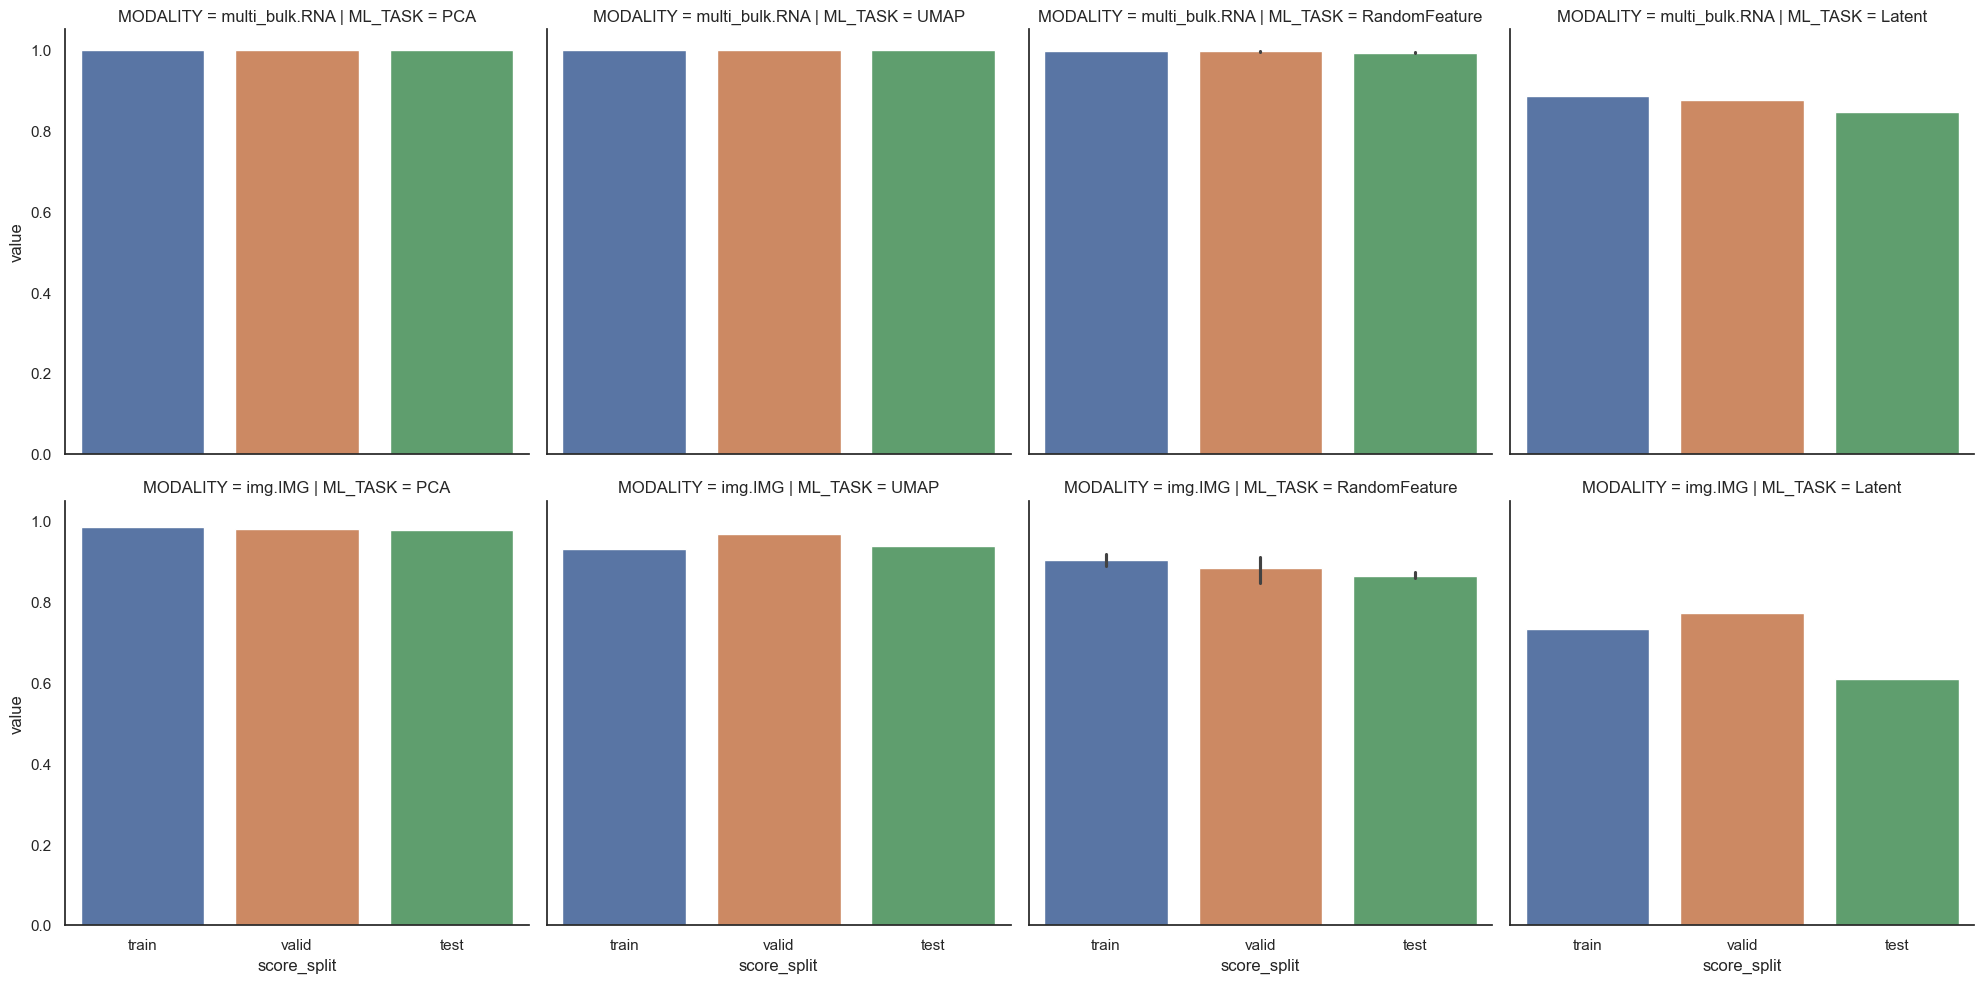

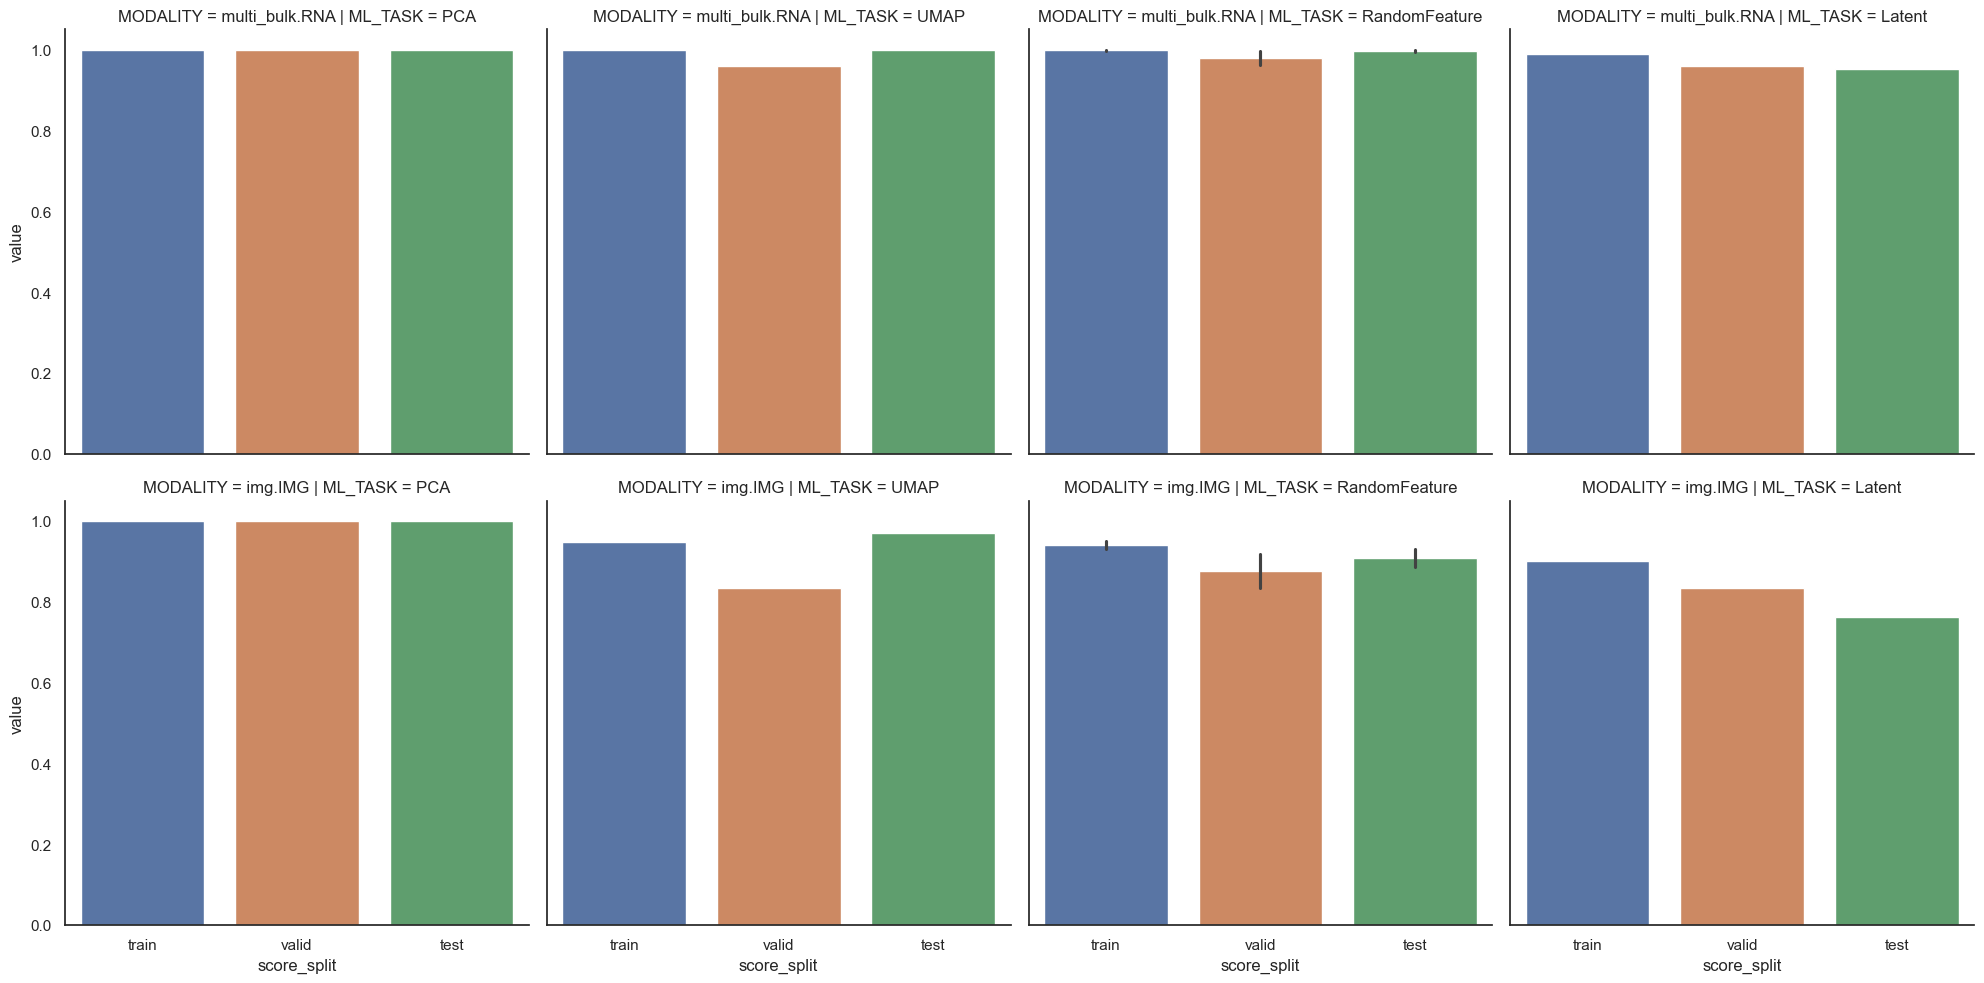

In [11]:
fig = xmodalix._visualizer.show_evaluation(
	param="early",
	metric="roc_auc_ovo"
)

## UMAP/PCA translation visualization

In [14]:
fig = xmodalix._visualizer.show_2D_translation(
	result=xmodalix.result,
	translated_modality="img.IMG",
	split="test",
	param="early",
	# param="extra_class_labels",
	reducer="UMAP",
)

len of tensor-list: 52
len of tensor_ids: 52
(104, 8192)
(0, 8192)
Unexpected exception formatting exception. Falling back to standard exception


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5y/4yr_9t4x5zgf77_zw1krm4vw0000gn/T/ipykernel_9001/3734721918.py", line 1, in <module>
    fig = xmodalix._visualizer.show_2D_translation(
  File "/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/visualize/_xmodal_visualizer.py", line 571, in show_2D_translation
    df_red_comb["origin"] = ["input"] * df_processed.shape[0] + [
  File "/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/umap/umap_.py", line 2928, in fit_transform


In [ ]:
len(xmodalix.result.reconstructions.get(split="test", epoch=-1)["translation"])


52

In [ ]:
xmodalix.result.sample_ids.get(split="test", epoch=-1)

{'multi_bulk.RNA': array(['T_1', 'T_106', 'T_110', 'T_118', 'T_119', 'T_125', 'T_129',
        'T_132', 'T_135', 'T_136', 'T_138', 'T_142', 'T_147', 'T_148',
        'T_150', 'T_152', 'T_156', 'T_158', 'T_160', 'T_165', 'T_166',
        'T_179', 'T_182', 'T_187', 'T_192', 'T_195', 'T_213', 'T_215',
        'T_24', 'T_245', 'T_27', 'T_29', 'T_31', 'T_36', 'T_44', 'T_51',
        'T_52', 'T_54', 'T_59', 'T_63', 'T_66', 'T_68', 'T_69', 'T_7',
        'T_72', 'T_75', 'T_77', 'T_80', 'T_81', 'T_89', 'T_92', 'T_97'],
       dtype='<U5'),
 'img.IMG': array(['T_1', 'T_106', 'T_110', 'T_118', 'T_119', 'T_125', 'T_129',
        'T_132', 'T_135', 'T_136', 'T_138', 'T_142', 'T_147', 'T_148',
        'T_150', 'T_152', 'T_156', 'T_158', 'T_160', 'T_165', 'T_166',
        'T_179', 'T_182', 'T_187', 'T_192', 'T_195', 'T_213', 'T_215',
        'T_24', 'T_245', 'T_27', 'T_29', 'T_31', 'T_36', 'T_44', 'T_51',
        'T_52', 'T_54', 'T_59', 'T_63', 'T_66', 'T_68', 'T_69', 'T_7',
        'T_72', 'T_75', '

## Recon error and VAE pure comparison

In [ ]:
## Imagix (pure comparison)
from autoencodix.configs.default_config import DataCase

img_config2 = img_config # Copy from x-modalix

img_config2.data_case = DataCase.IMG_TO_IMG

img_config2.data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
				scaling="MINMAX",
                data_type="IMG",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    )
img_config2.beta = 0.01

In [ ]:
imagix = acx.Imagix(config=img_config2)
imagix.run()

In [ ]:
imagix.show_result()

In [ ]:
# n_samples = 3
imagix.result.datasets.test.sample_ids

In [ ]:
imagix._visualizer.show_image_recon_grid(result=imagix.result)

In [ ]:
param = "early"
fig, df_comparison = xmodalix._evaluator.pure_vae_comparison(
	xmodalix_result = xmodalix.result,
	pure_vae_result = imagix.result,
	to_key = "img.IMG",
	param = param
)

xmodalix._visualizer.plots["PureVAEComparison"][param] = fig
fig.figure